In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import copy
import math

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
print(type(diabetes))
diabetes["frame"]
# We can see that all the features are scaled so we don't have to do scaling

<class 'sklearn.utils._bunch.Bunch'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<AxesSubplot: >

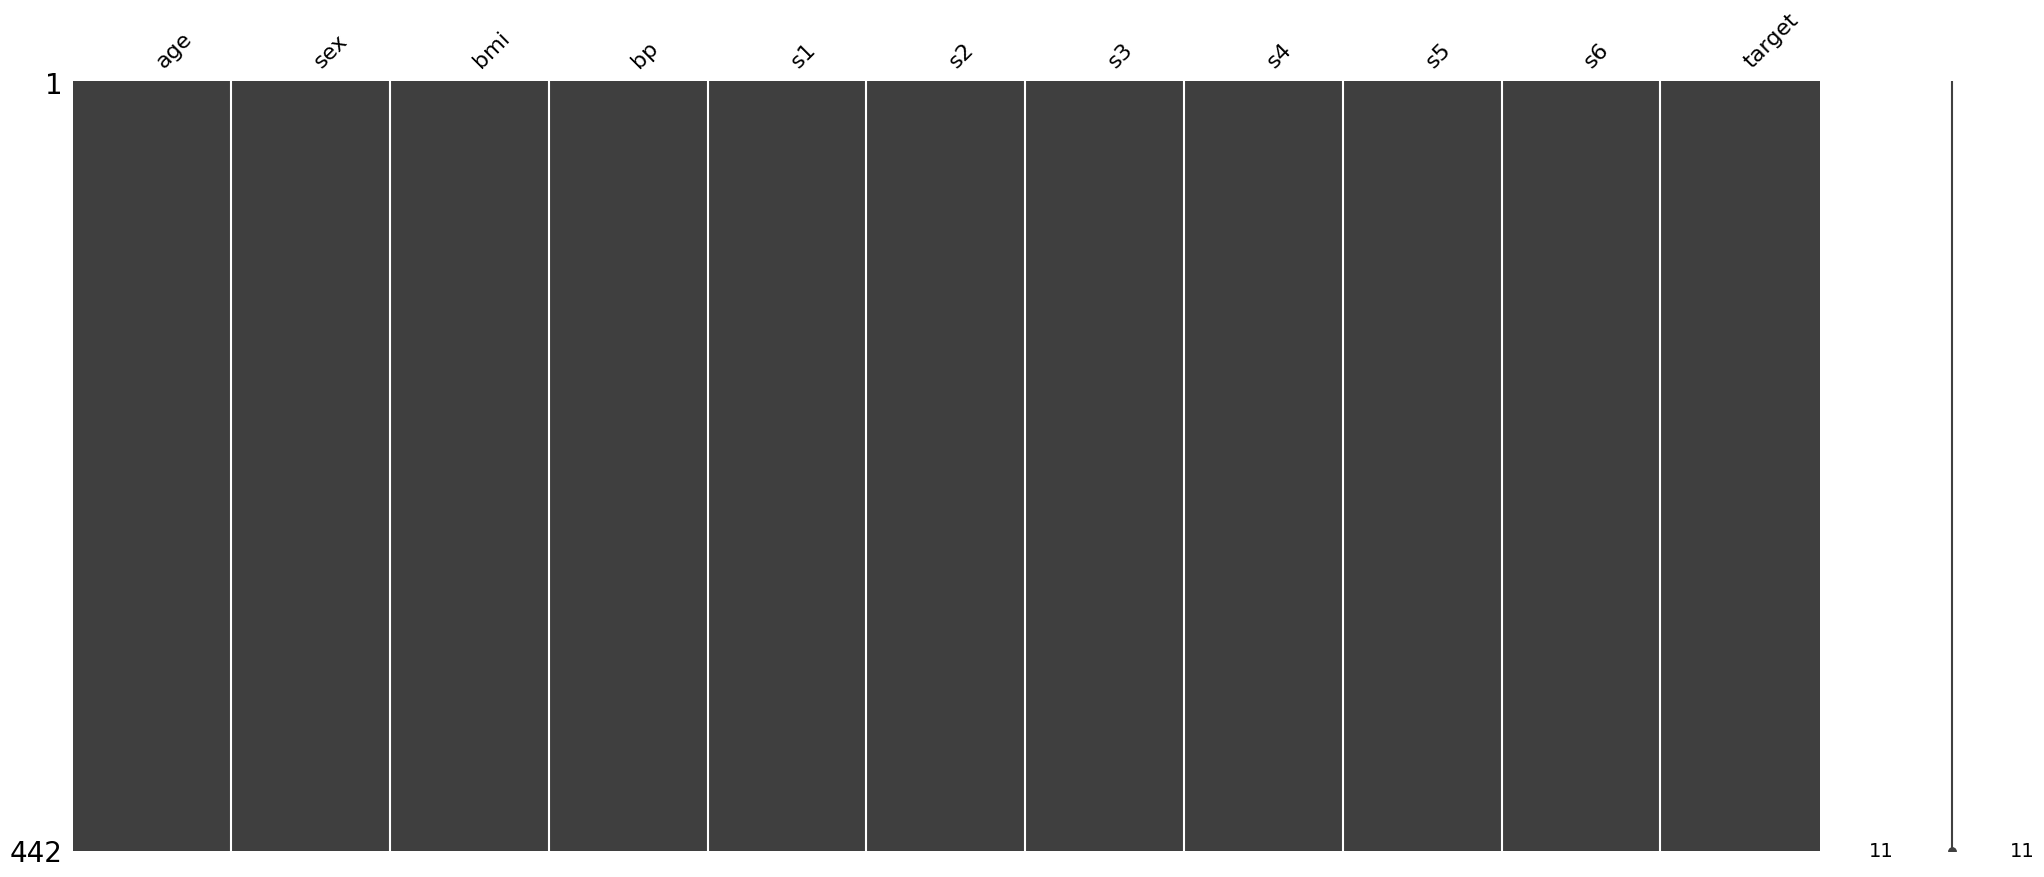

In [3]:
# Visual representation of the data. We can see that there is no NULL value in our data
import missingno as msno
msno.matrix(diabetes["frame"])

In [4]:
print(list(diabetes))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data.values, diabetes.target.values, test_size=0.2, random_state= 72)

In [8]:
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")
type(X_train)

(353, 10), (89, 10), (353,), (89,)


numpy.ndarray

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 



Cost function with multiple variables = $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [9]:
class LinearRegression_AA:
    
    # A class which implements linear regression model with gradient descent.
    
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def Cost(y, y_hat):
        # Private method. Because it will only be used in the other methods of this class.
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / (len(y)*2)
    
    def fit(self, X, y):
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Predicted value
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self.Cost(y, y_hat)
            if i % 500 == 0:
                print(f"The cost at {i}. iteration is {loss}")
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        # By taking the dot product between weight model and X we find a scaler. By adding that to bias we wind the final result.
        return np.dot(X, self.weights) + self.bias

In [10]:
re = LinearRegression_AA()
re.fit(X_train,y_train)
pred = re.predict(X_test)

The cost at 0. iteration is 14145.99716713881
The cost at 500. iteration is 2713.7304683391203
The cost at 1000. iteration is 2580.2899689668848
The cost at 1500. iteration is 2466.1241660581977
The cost at 2000. iteration is 2368.1824028832075
The cost at 2500. iteration is 2283.9106444919526
The cost at 3000. iteration is 2211.1699357937296
The cost at 3500. iteration is 2148.1682959981617
The cost at 4000. iteration is 2093.4038203496402
The cost at 4500. iteration is 2045.6171432017559
The cost at 5000. iteration is 2003.7517206181808
The cost at 5500. iteration is 1966.920644710772
The cost at 6000. iteration is 1934.3789140929046
The cost at 6500. iteration is 1905.5002620333717
The cost at 7000. iteration is 1879.757791904523
The cost at 7500. iteration is 1856.7077931389506
The cost at 8000. iteration is 1835.9762141609676
The cost at 8500. iteration is 1817.2473549981955
The cost at 9000. iteration is 1800.2544143086573
The cost at 9500. iteration is 1784.771585720951


In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.4922075095099353

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
predict_sklearn = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,predict_sklearn)

0.6579197606548159

In [14]:
#reshaped_predict = predict.reshape(len(predict),1)
#reshaped_y_test = y_test.values.reshape(len(y_test),1)
#res = np.concatenate((reshaped_predict,reshaped_y_test),1)
#print(res)
## Prediction   Correct Values

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_df

,Actual Value,Predicted Value,Difference
0,85.0,81.106896,3.893104
1,248.0,216.052582,31.947418
2,57.0,91.489046,-34.489046
3,136.0,127.787064,8.212936
4,138.0,108.333304,29.666696
...,...,...,...
84,150.0,188.499187,-38.499187
85,288.0,170.554657,117.445343
86,135.0,127.054632,7.945368
87,140.0,108.042360,31.957640


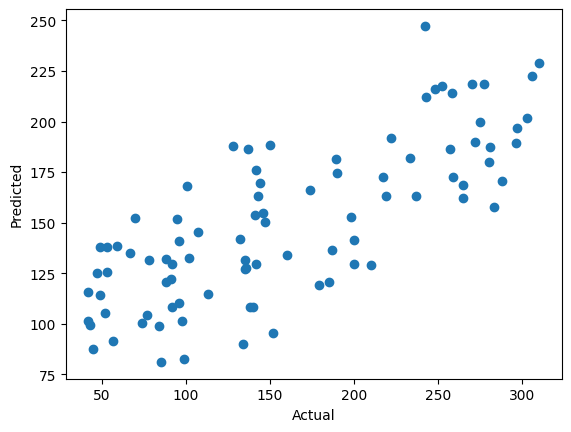

In [16]:
plt.scatter(y_test,pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

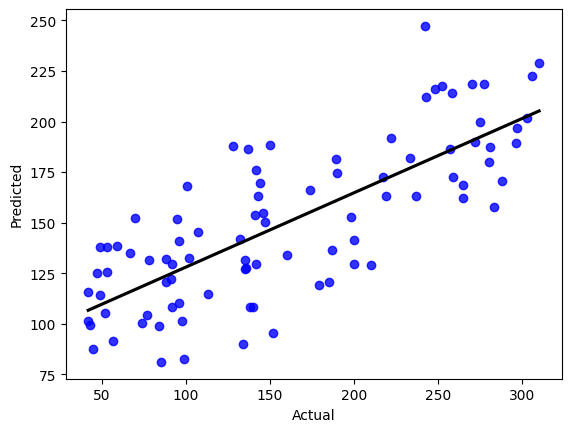

In [17]:
import seaborn as sns
graph = sns.regplot(x=y_test,y=pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "black"});
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show(graph)

#### Problem 2 ### 

In [18]:
df = sklearn.datasets.fetch_openml(name="house_prices")
print(list(df))

['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [19]:
print(df.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [20]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
missing = (df.data.isnull().sum(axis = 0)).sort_values(ascending= False)
missing

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageYrBlt        81
GarageQual         81
GarageCond         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
HalfBath            0
BsmtFullBath        0
BsmtHalfBath        0
BedroomAbvGr        0
FullBath            0
TotRmsAbvGrd        0
Functional          0
KitchenAbvGr        0
KitchenQual         0
Id                  0
Fireplaces          0
LowQualFinSF        0
GarageCars          0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
GrLivArea           0
HeatingQC 

<AxesSubplot: >

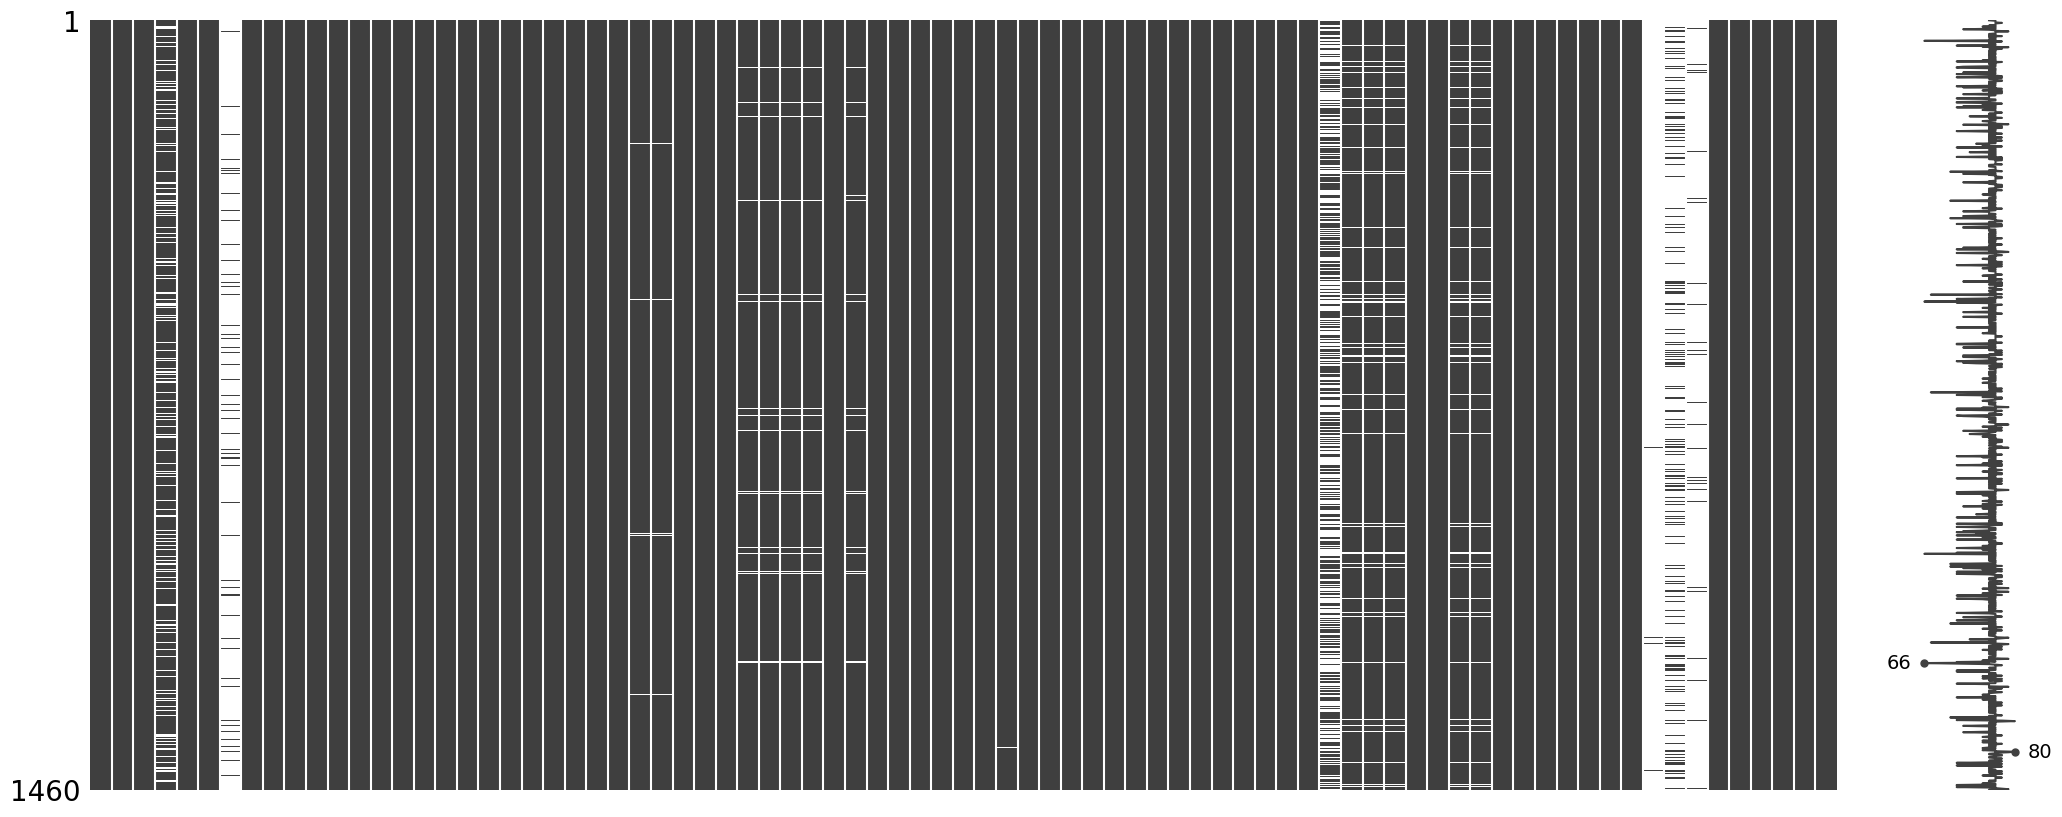

In [21]:
msno.matrix(df["frame"])

In [22]:
df.data = df.data.dropna(axis=1)


<AxesSubplot: >

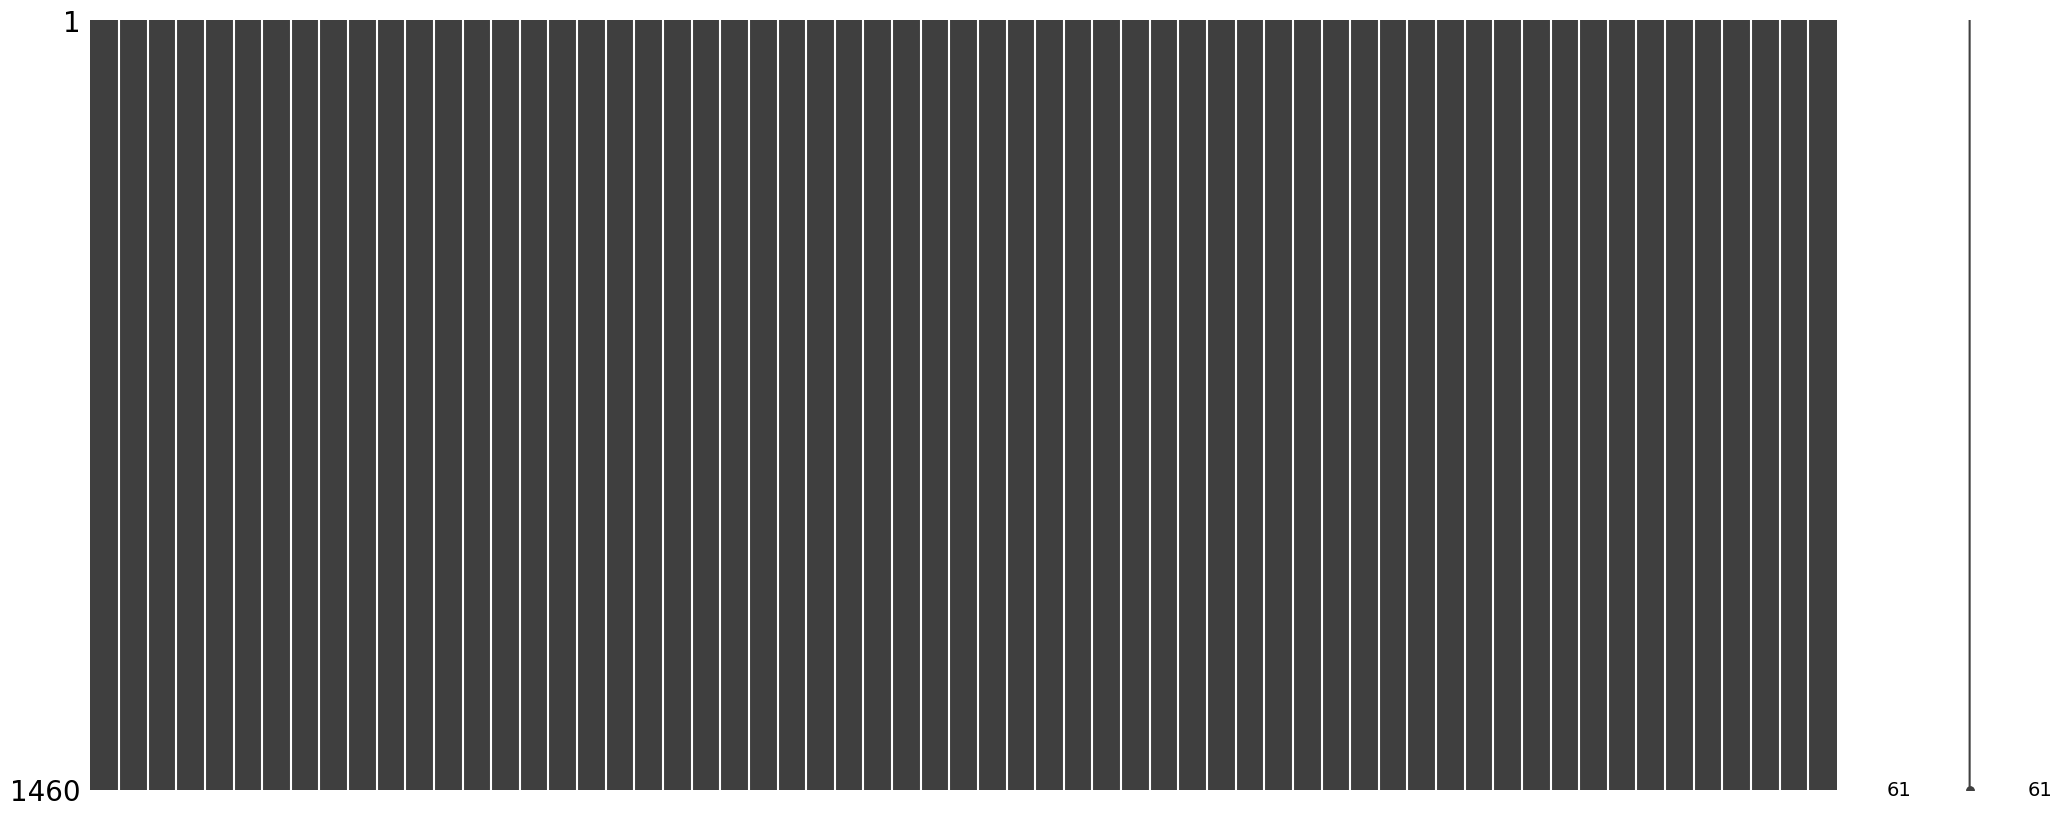

In [23]:
msno.matrix(df["data"])

In [24]:
df.data = df.data.drop(["Id"],axis=1)

In [25]:
df_num = df.data.select_dtypes(exclude=["object"])
df_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,9.0,2.0,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,1078.0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

In [27]:
X = df_num_scaled
y = df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [28]:
regressor2 = LinearRegression()
regressor2.fit(X_train,y_train)

LinearRegression()

In [29]:
predict2 = regressor2.predict(X_test)

In [30]:
pred_df2=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predict2,'Difference':y_test-predict2})
pred_df2

,Actual Value,Predicted Value,Difference
0,228500.0,230542.249244,-2042.249244
1,216000.0,217625.716886,-1625.716886
2,150750.0,159238.249244,-8488.249244
3,134000.0,142298.249244,-8298.249244
4,90350.0,82806.249244,7543.750756
...,...,...,...
287,163500.0,211190.249244,-47690.249244
288,140000.0,162607.760031,-22607.760031
289,290000.0,285478.249244,4521.750756
290,86000.0,71971.227672,14028.772328


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,predict2)

0.8429068885584565

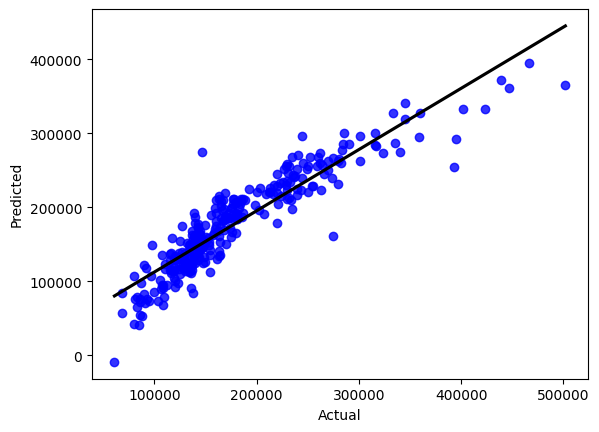

In [32]:
graph = sns.regplot(x=y_test,y=predict2,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "black"});
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show(graph)